In [1]:
# Counter example showing that the absolute distance does not satisfy the mean-as-minimizer property
# of a Bregman divergence and, hence, is not induced by any PSR. Results for the appendix.

import matplotlib.pyplot as plt
import numpy as np
from expected_cost import ec, utils
from expected_cost.data import create_scores_for_expts
from psrcal.losses import plot_reliability_diagram

from expected_cost.psrcal_wrappers import Brier, LogLoss, ECE, ECEbin, L2ECEbin, CalLoss

import os 
# Replace with your path to latex 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
params = {'text.usetex': True} 
plt.rcParams.update(params)

outdir = "outputs/"
utils.mkdir_p(outdir)




In [2]:
# Use our score generation method to create some scores (any scores will do for this example)
num_targets = 2 
N = 6 * num_targets
feat_var = 0.15
score_dict, targets = create_scores_for_expts(num_targets, N=N, P0=0.6, calibrate=False, simple_names=True, feat_var=feat_var, sim_name='gaussian_sim_md')
scores = np.exp(score_dict['cal'])


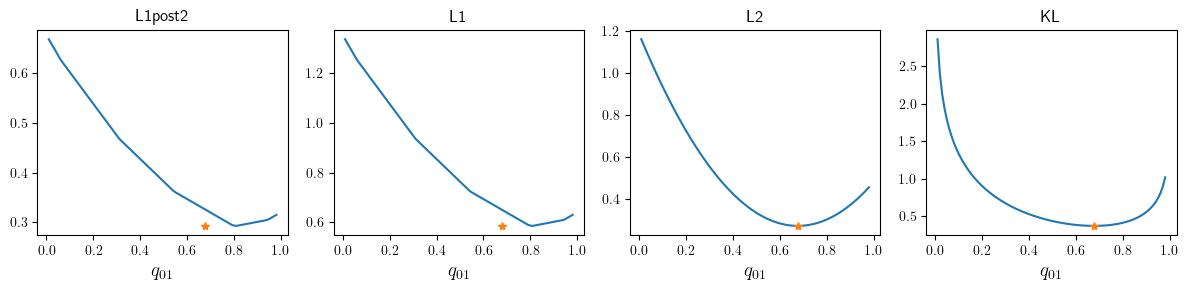

In [3]:
r0s = np.arange(0.01,0.99,0.01)

expected_div = {'L1post2':[], 'L1':[], 'L2':[], 'KL':[]}

for r0 in r0s:
    r0vec = np.c_[r0,1-r0]

    diff = scores - r0vec

    # L1 norm between the posteriors for class 2
    div = np.abs(diff[:,0]) 
    expected_div['L1post2'].append(np.mean(div))

    # L1 norm between the two full vectors (not exactly what ECE does)
    div = np.linalg.norm(diff, ord=1, axis=1) 
    expected_div['L1'].append(np.mean(div))

    # L2 norm 
    div = np.linalg.norm(diff, ord=2, axis=1)**2
    expected_div['L2'].append(np.mean(div))

    # KL distance
    div = np.sum(scores * np.log(scores/r0vec), axis=1)
    expected_div['KL'].append(np.mean(div))
    

fig, axs = plt.subplots(1,4, figsize=(12,3))

i = 0
for div_name, div_list in expected_div.items():

    ax = axs[i]
    ax.plot(r0s, div_list)
    ax.plot(np.mean(scores,axis=0)[0], np.min(div_list), '*')
    ax.set_xlabel('$q_{01}$', fontsize=14)
    ax.set_title(div_name)
    i += 1

plt.tight_layout()
plt.savefig('outputs/divergences.pdf')
